In [2]:
import pandas as pd 
import os
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
df=pd.read_csv('./student_performance_dataset.csv')
df.head(2)

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail


In [4]:
df.isna().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [ ]:
df=df.drop(columns=['Student_ID'])
df.head(2)

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail


In [12]:
df.dtypes

Gender                         object
Study_Hours_per_Week            int64
Attendance_Rate               float64
Past_Exam_Scores                int64
Parental_Education_Level       object
Internet_Access_at_Home        object
Extracurricular_Activities     object
Final_Exam_Score                int64
Pass_Fail                      object
dtype: object

In [13]:
df_with_dummies=pd.get_dummies(df, columns=['Gender','Parental_Education_Level','Internet_Access_at_Home','Extracurricular_Activities'], drop_first=True)
df_with_dummies.head(2)

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score,Pass_Fail,Gender_Male,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD,Internet_Access_at_Home_Yes,Extracurricular_Activities_Yes
0,31,68.267841,86,63,Pass,True,True,False,False,True,True
1,16,78.222927,73,50,Fail,True,False,False,True,False,False


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
y=df_with_dummies['Pass_Fail']
x=df_with_dummies.drop(columns=['Pass_Fail'], axis=1)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=42)
model=LogisticRegression(random_state=42)
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
print("Training scores: ",accuracy_score(y_train, y_train_pred))
y_pred=model.predict(x_test)

print("Test scores: ",accuracy_score(y_test, y_pred))


Training scores:  0.9737373737373738
Test scores:  0.9765258215962441


**Seperating thenu merical columns and categorical columns**

In [22]:
numerical_cols=[col for col in df.columns if df[col].dtype in ['int64', 'float64'] ]

print(numerical_cols)

['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']


In [23]:
categorical_cols=[col for col in df.columns if col not in numerical_cols]
print(categorical_cols)

['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']


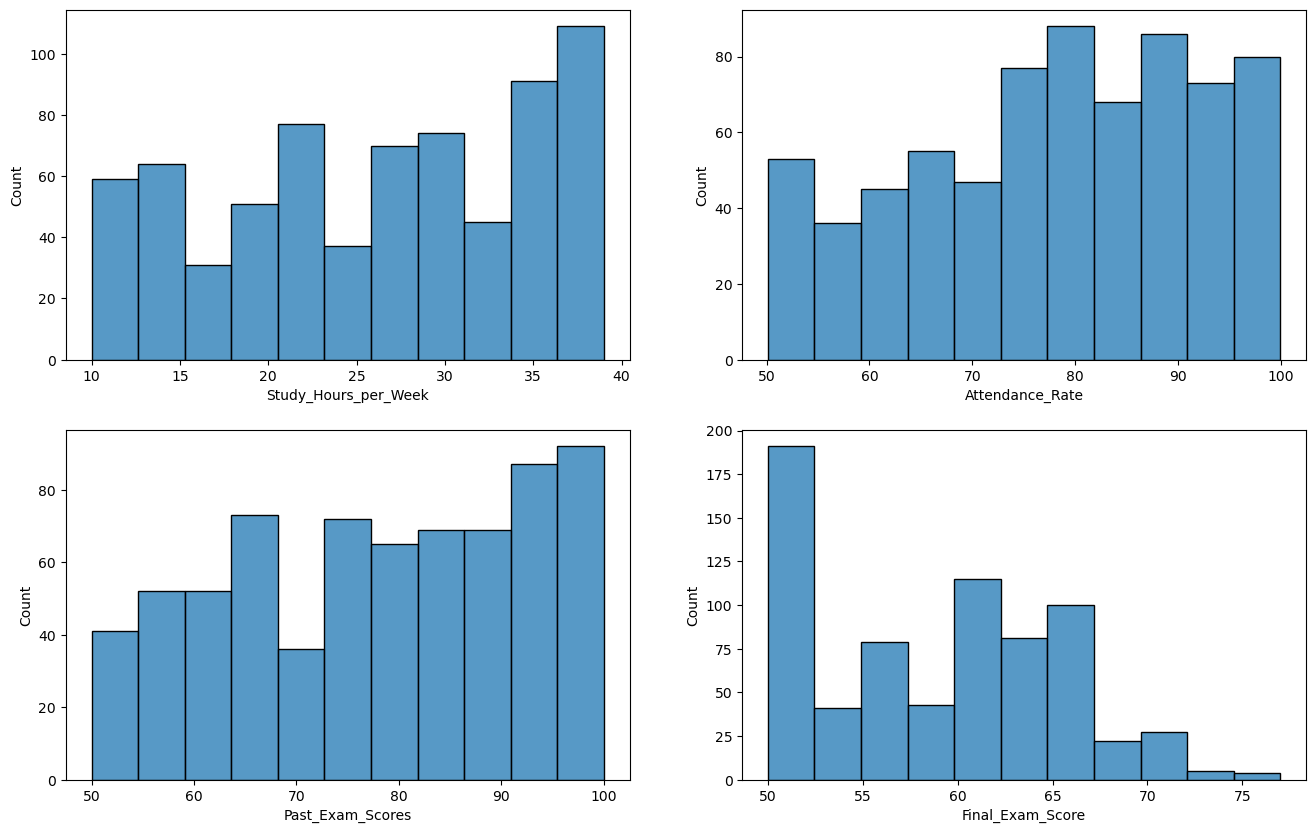

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

# enumerate is a tool that helps us keep track of two things:

# The position of the column in the list (1st, 2nd, 3rd, etc.)
# The name of the column itself.
# The 1 tells enumerate to start counting from 1 instead of 0 (which is the default in programming).
for i,col in enumerate(numerical_cols,1):   
    plt.subplot(2,2,i)
    sns.histplot(data=df, x=col)

plt.show()

In [36]:
corr=df[numerical_cols].corr()
corr

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
Study_Hours_per_Week,1.000000,-0.008150,-0.014756,0.370387
Attendance_Rate,-0.008150,1.000000,0.000412,0.460478
Past_Exam_Scores,-0.014756,0.000412,1.000000,0.489516
Final_Exam_Score,0.370387,0.460478,0.489516,1.000000


<Axes: >

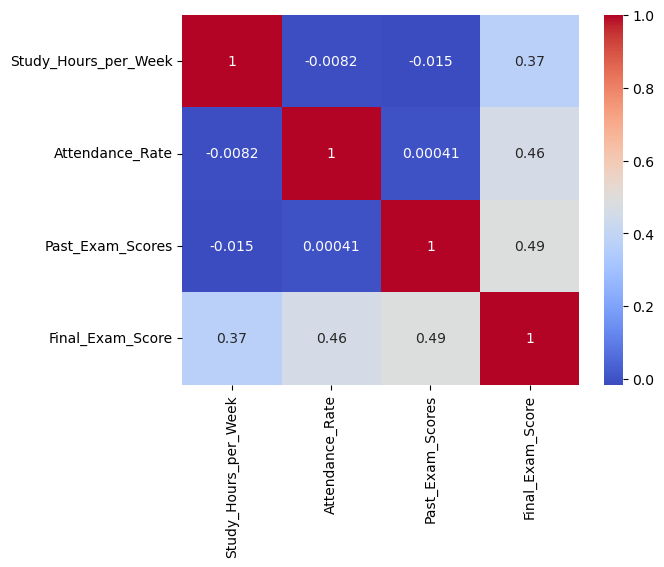

In [42]:
sns.heatmap(corr, annot=True , cmap='coolwarm')

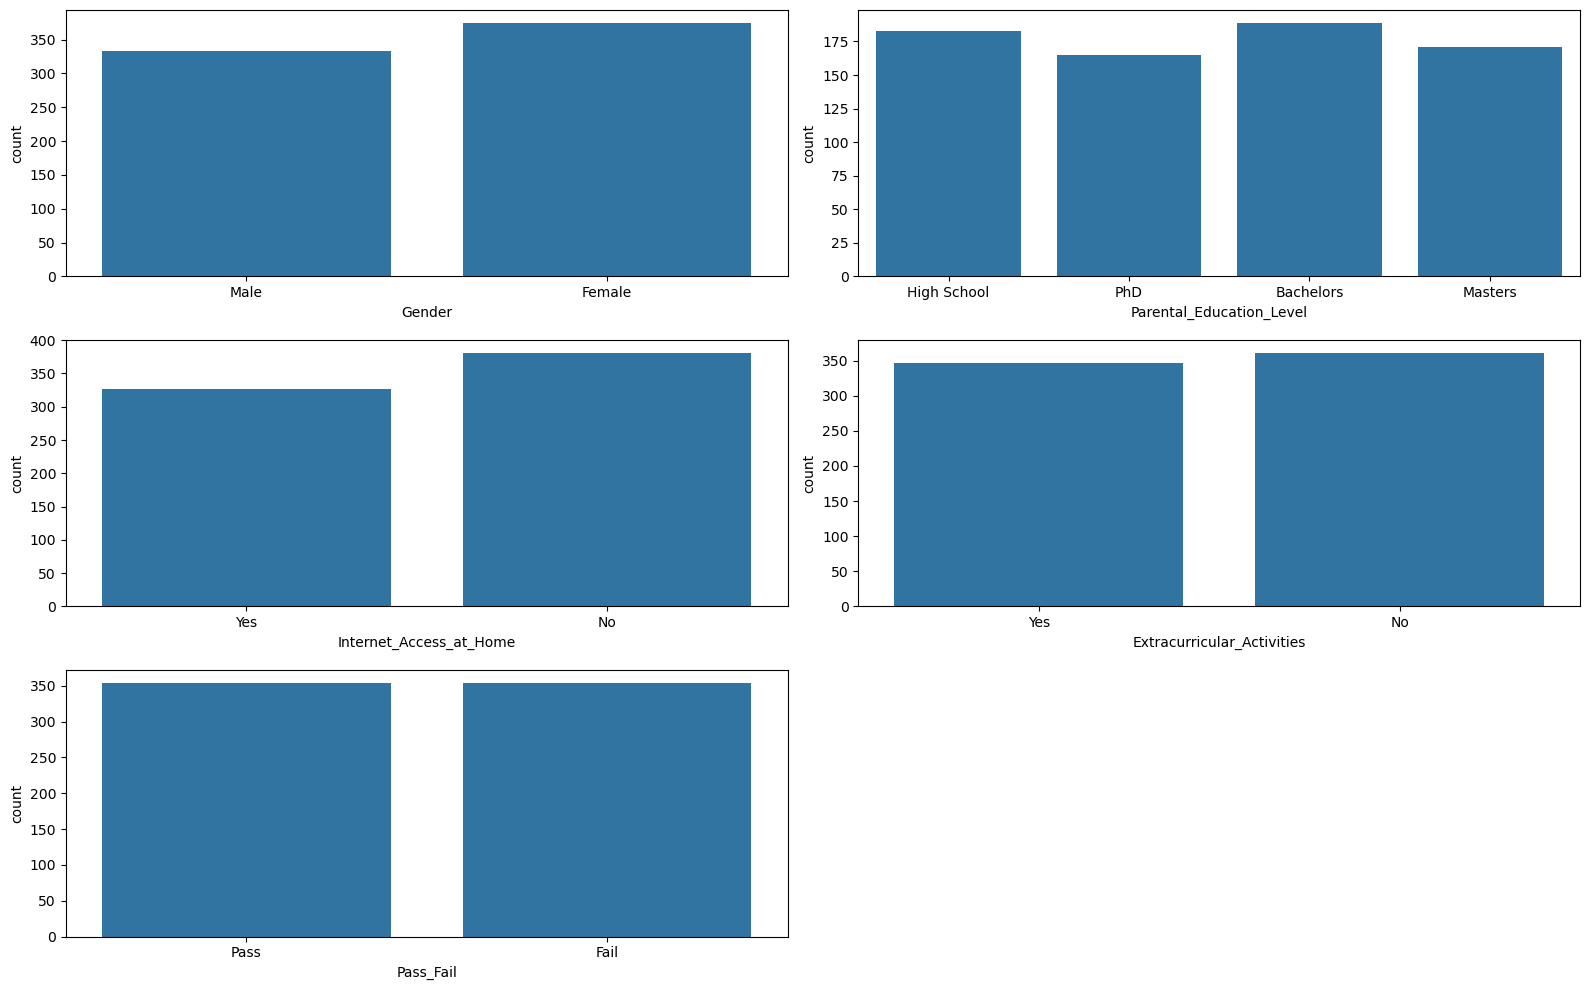

In [46]:
plt.figure(figsize=(16,10))
for i,col in enumerate(categorical_cols,1):
    plt.subplot(3,2,i)
    sns.countplot(data=df, x=col)
plt.tight_layout()
plt.show()

<Axes: xlabel='Internet_Access_at_Home', ylabel='Pass_Fail'>

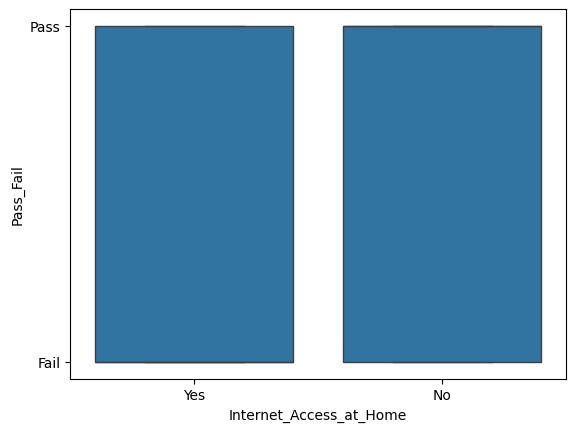

In [52]:
# finding correlations between final_exam_score and the other categorical data
sns.boxplot(data=df, y='Pass_Fail',x='Internet_Access_at_Home')